In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import os
import re

In [2]:
# Especifica el directorio donde están los archivos CSV
carpeta ="../data/raw/"

# Obtén la lista de todos los archivos en la carpeta
archivos = os.listdir(carpeta)
archivos

['RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgFullServiceRestaurantNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Carbondale-Southern.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Aurora.Muni.csv',
 'RefBldgHospitalNew2004_v1.3_7.1_5A_USA_IL_CHICAGO-OHARE_Bloomington.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv',
 'RefBldgLargeHotelNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Cahokia.csv',
 'RefBldgLargeHotelNew2004_v1.3_

In [3]:
prueba=pd.read_csv("../data/raw/RefBldgFullServiceRestaurantNew2004_v1.3_7.1_4A_USA_MD_BALTIMORE_Belleville-Scott.csv")
prueba.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,22.453919,3.998243,0.000733,0.0,4.589925,8.1892,141.366183,131.097222,3.33988,6.929081
1,01/01 02:00:00,14.637149,0.000000,0.000000,0.0,1.529975,7.4902,3.931971,0.000000,3.33988,0.592091
2,01/01 03:00:00,14.651183,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
3,01/01 04:00:00,14.657947,0.000000,0.000000,0.0,1.529975,7.4902,3.359880,0.000000,3.33988,0.020000
4,01/01 05:00:00,14.806050,0.000000,0.000000,0.0,1.529975,7.4902,3.931942,0.000000,3.33988,0.592062


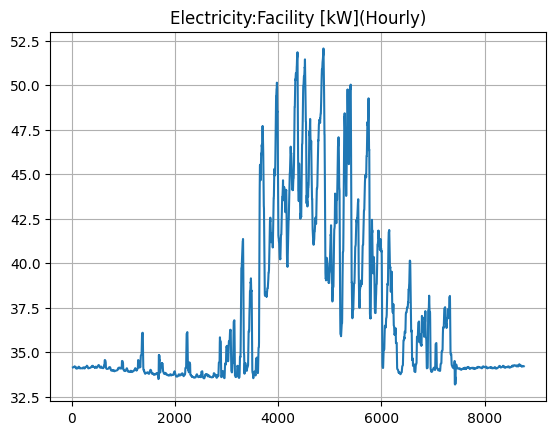

In [28]:
window_size=24
window_sized=prueba["Electricity:Facility [kW](Hourly)"].copy().rolling(window=window_size)
df_smoothed=window_sized.mean()
df_smoothed.plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

In [4]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'Cooling:Electricity [kW](Hourly)',
    'Heating:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)',
    'InteriorEquipment:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)
# # Combine all dataframes into one
combined_df = pd.concat(dfs, axis=0, ignore_index=True)
# # Set Date/Time as index
# combined_df.set_index('Date/Time', inplace=True)

In [5]:
dfs[0].head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,0.000733,0.0,4.589925,8.1892,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,0.000000,0.0,1.529975,7.4902,RefBldgFullServiceRestaurantNew2004


In [6]:
dfs[0].tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),type_building
8755,2004-12-31 20:00:00,38.653890,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8756,2004-12-31 21:00:00,38.637599,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8757,2004-12-31 22:00:00,38.577471,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8758,2004-12-31 23:00:00,38.458116,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004
8759,NaT,39.254839,3.998243,0.0,0.0,9.179851,19.4245,RefBldgFullServiceRestaurantNew2004


In [7]:
# dfs[0].resample("D").sum().head()

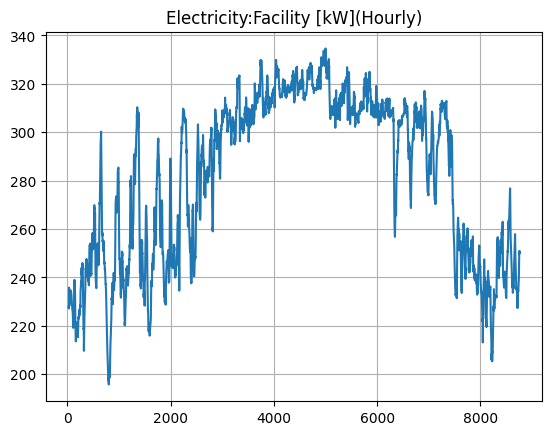

In [8]:
window_size=24
window_sized=dfs[10]["Electricity:Facility [kW](Hourly)"].copy().rolling(window=window_size)
df_smoothed=window_sized.mean()
df_smoothed.plot()
plt.title('Electricity:Facility [kW](Hourly)')
plt.grid(True)
plt.show()

In [15]:
combined_df.to_csv("../data/interim/estadisticas_edificios_combinados.csv",index=False)

In [16]:
combined_df_features=combined_df.iloc[:,1:-1]
combined_df_features.head()

,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly)
0,22.453919,3.998243,0.000733,0.0,4.589925,8.1892
1,14.637149,0.000000,0.000000,0.0,1.529975,7.4902
2,14.651183,0.000000,0.000000,0.0,1.529975,7.4902
3,14.657947,0.000000,0.000000,0.0,1.529975,7.4902
4,14.806050,0.000000,0.000000,0.0,1.529975,7.4902


In [17]:
combined_df_features.columns

Index(['Electricity:Facility [kW](Hourly)', 'Fans:Electricity [kW](Hourly)',
       'Cooling:Electricity [kW](Hourly)', 'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)'],
      dtype='object')

In [18]:
combined_df_features['Heating:Electricity [kW](Hourly)'].median()

0.0

In [19]:
combined_df_features['Heating:Electricity [kW](Hourly)'].describe()

count    700800.000000
mean          1.360695
std           8.425415
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         279.414618
Name: Heating:Electricity [kW](Hourly), dtype: float64

In [20]:
combined_df_features['Heating:Electricity [kW](Hourly)'].std()

8.425414850919017

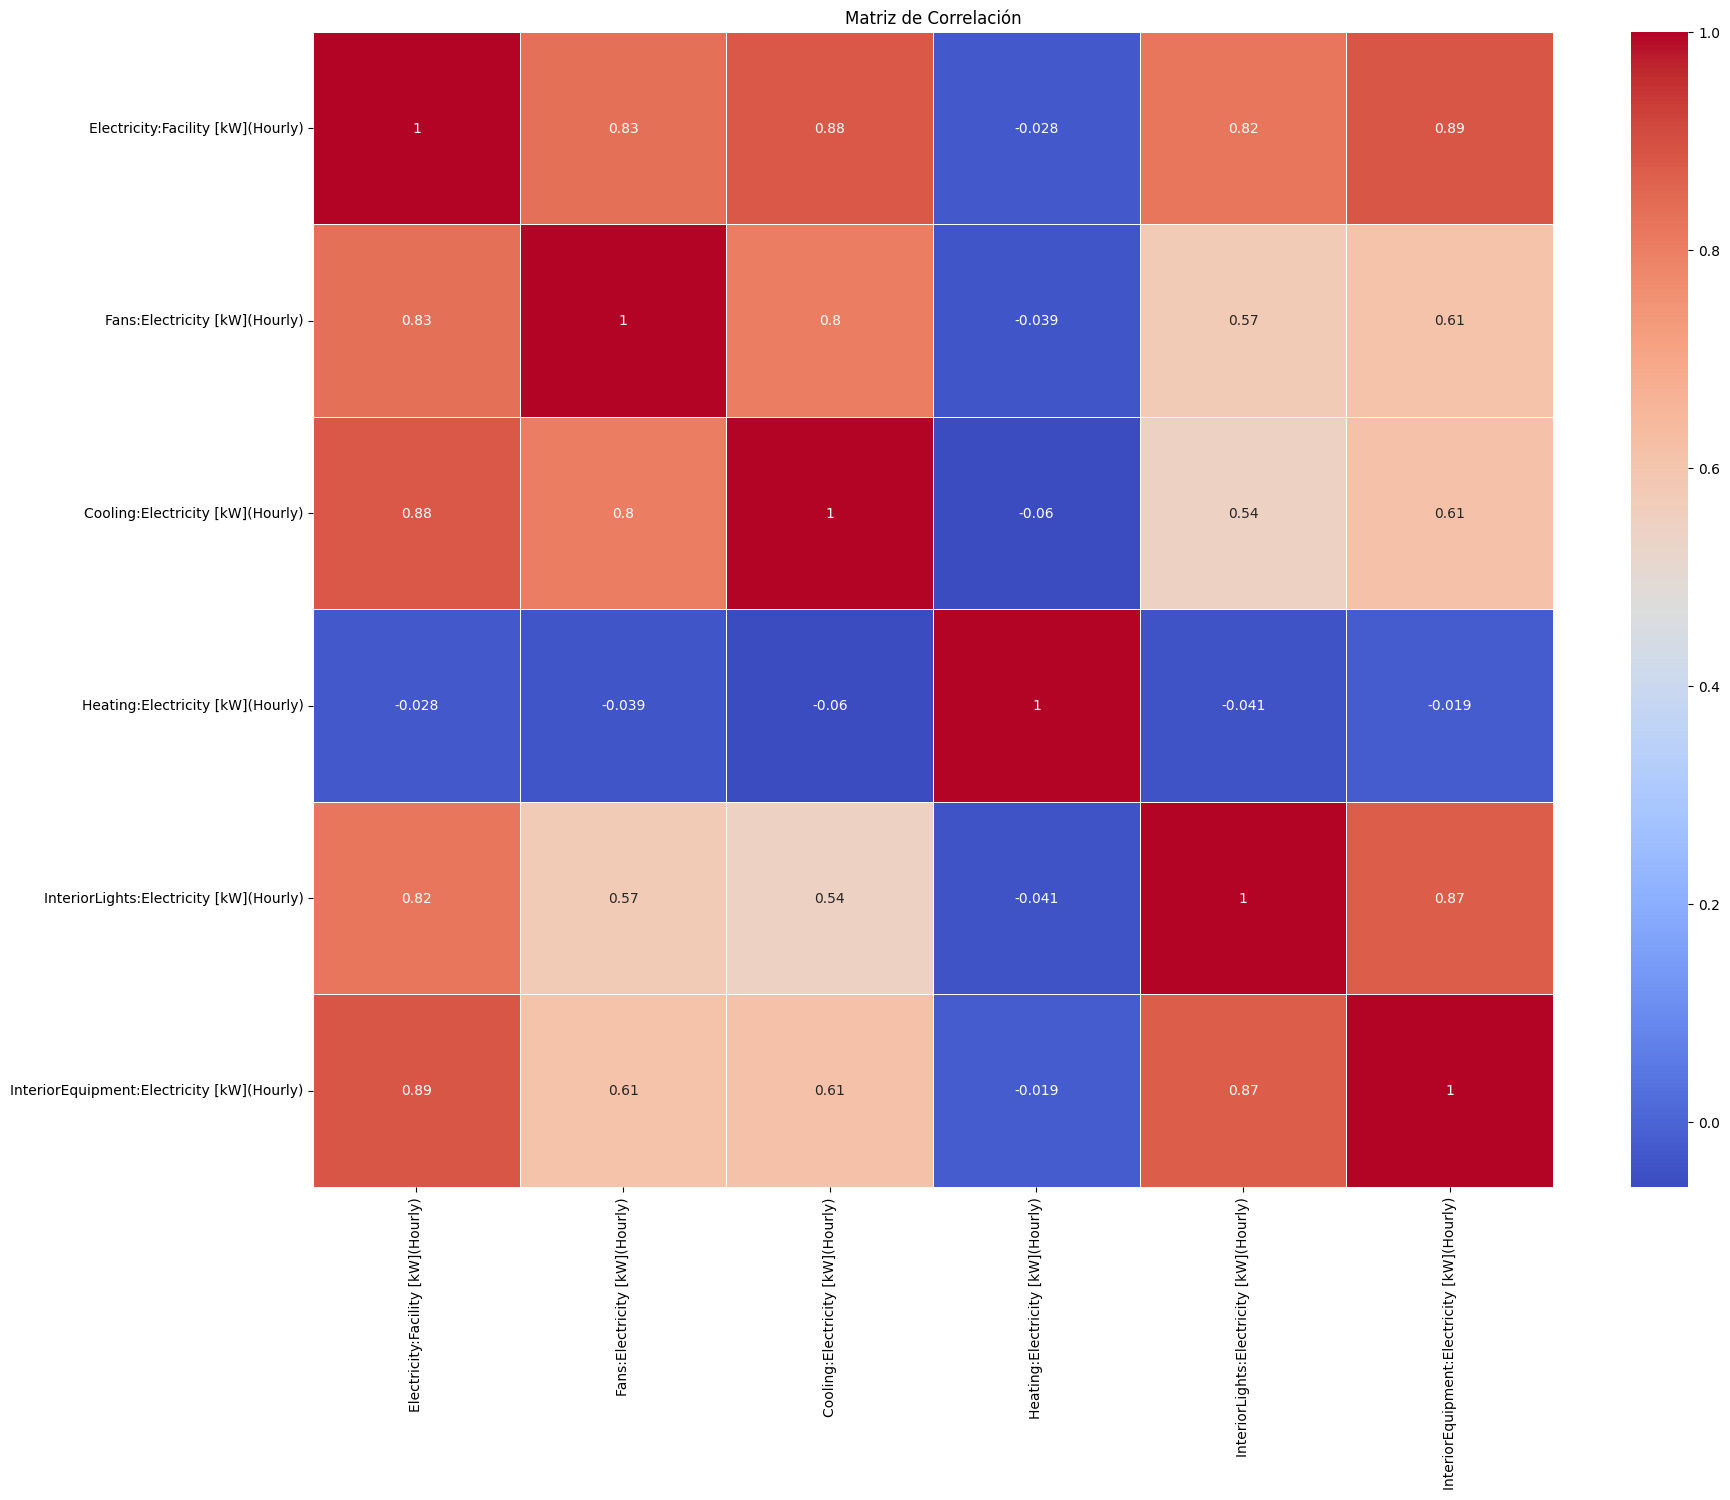

In [21]:
# Calcular la matriz de correlación
correlation_matrix = combined_df_features.corr()

# Mostrar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Empty DataFrame
Columns: [Feature1, Feature2, Correlation]
Index: []
Columnas eliminadas: set()


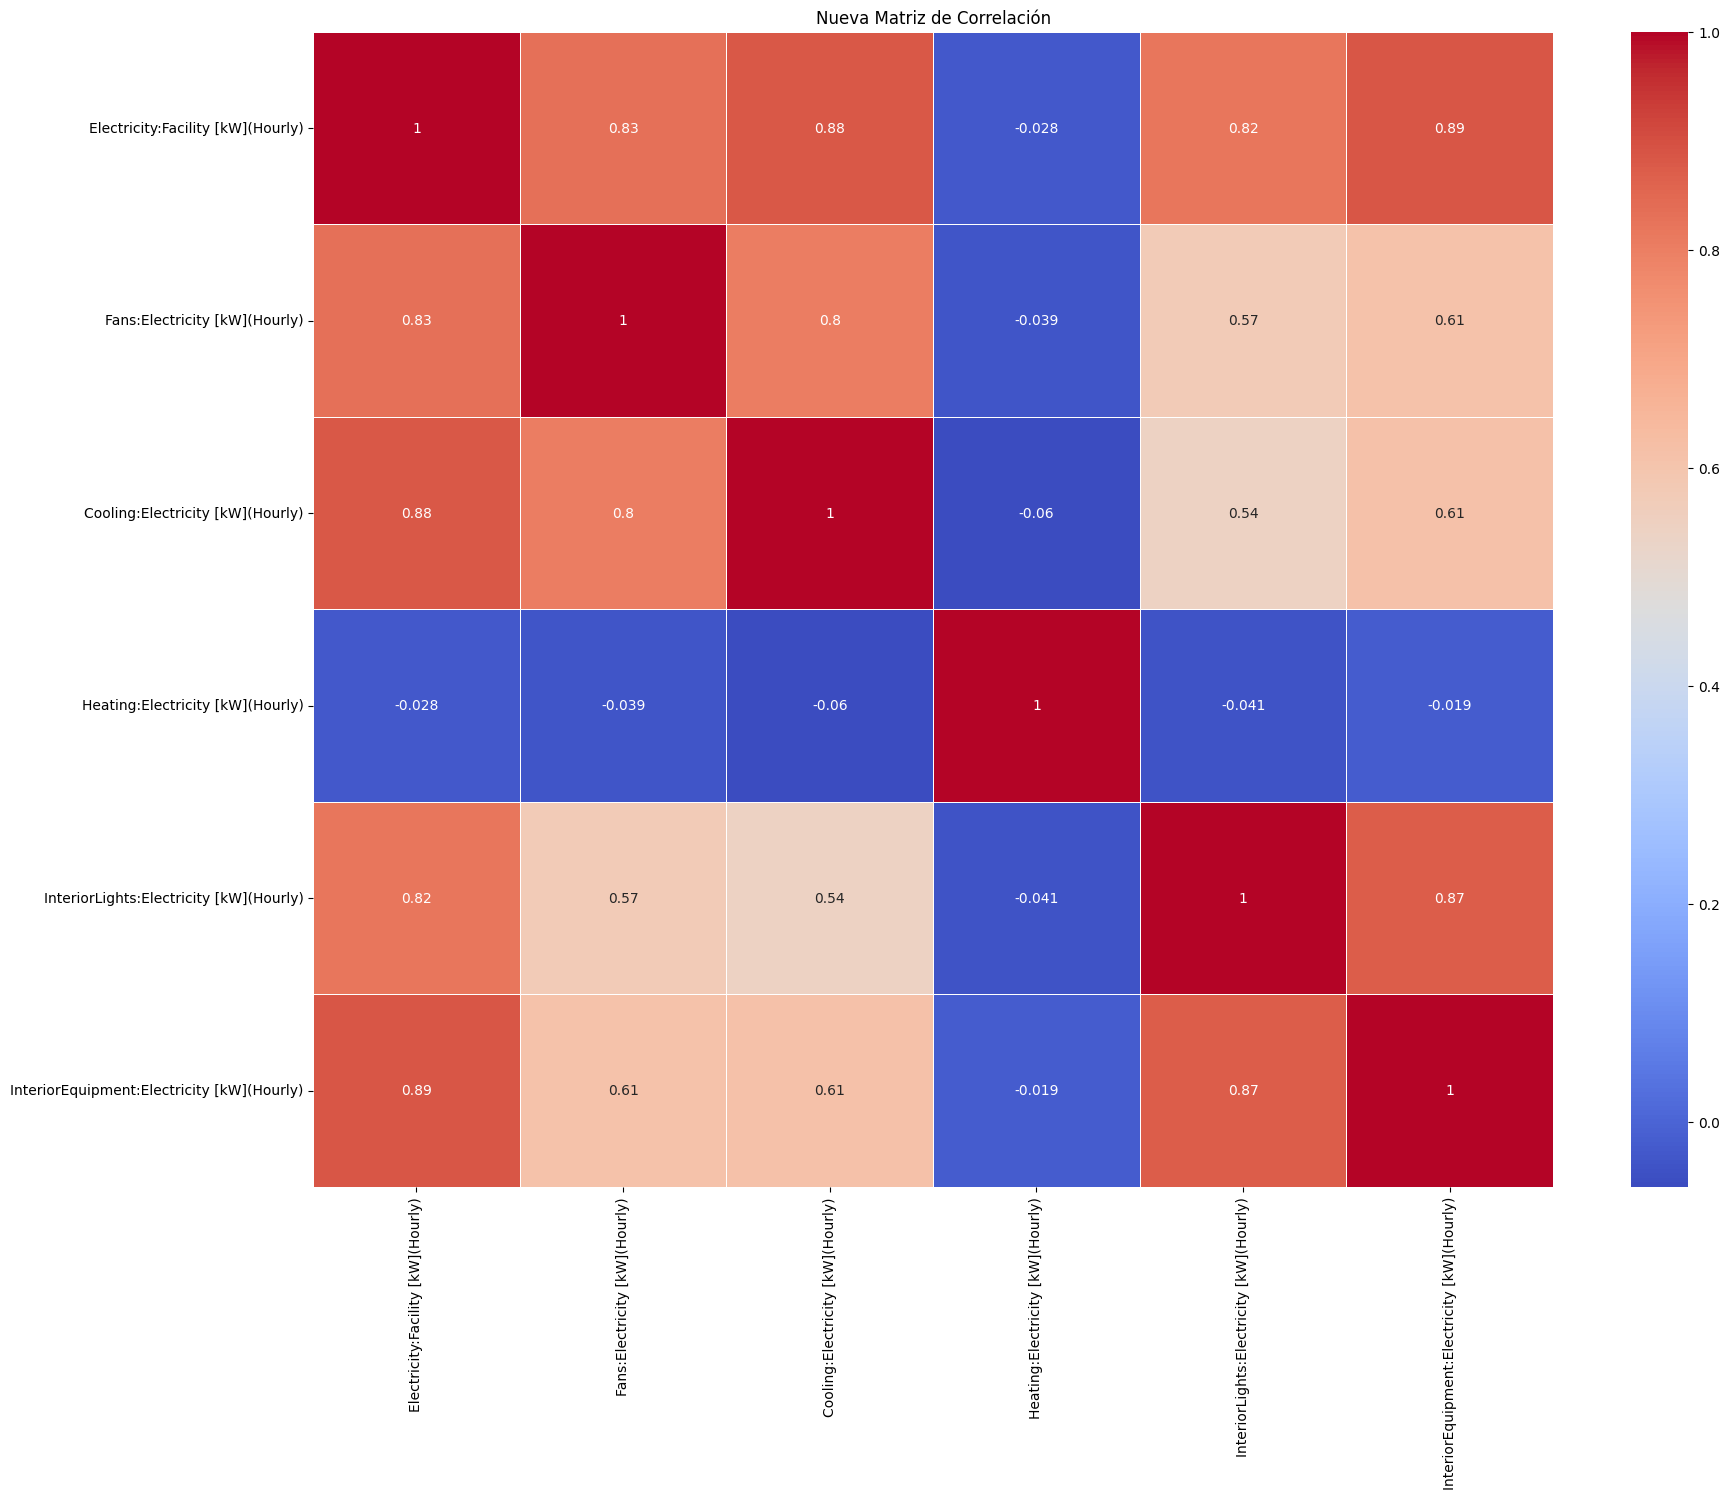

In [13]:

# Identificar las variables con alta correlación
# Usar un umbral, por ejemplo 0.9
threshold = 0.9
# Crear una matriz booleana donde los valores absolutos mayores que el umbral son True
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)

# Encontrar los pares de características altamente correlacionadas
correlated_pairs = high_correlation.stack().reset_index()
correlated_pairs = correlated_pairs[correlated_pairs[0]]
correlated_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Mostrar los pares de características correlacionadas
print(correlated_pairs)

# Eliminar una de las variables de cada par altamente correlacionado
columns_to_drop = set()
for feature1, feature2, _ in correlated_pairs.values:
    if feature1 not in columns_to_drop and feature2 not in columns_to_drop:
        # Eliminar la segunda variable del par
        columns_to_drop.add(feature2)

# Crear un nuevo DataFrame sin las variables colineales
reduced_df = combined_df_features.drop(columns=columns_to_drop)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas: {columns_to_drop}")

# Calcular y mostrar la nueva matriz de correlación
new_correlation_matrix = reduced_df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Nueva Matriz de Correlación')
plt.show()

In [26]:
# Identificar características altamente correlacionadas (umbral > 0.9)
threshold = 0.85
high_corr_var = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_var.add(correlation_matrix.columns[i])

high_corr_var

{'Cooling:Electricity [kW](Hourly)',
 'InteriorEquipment:Electricity [kW](Hourly)'}

In [27]:
# Eliminar las características altamente correlacionadas
data_reduced = combined_df.drop(columns=high_corr_var)

# Mostrar las primeras filas del nuevo DataFrame
data_reduced.head()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,0.0,4.589925,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,0.0,1.529975,RefBldgFullServiceRestaurantNew2004


In [29]:
data_reduced = data_reduced.drop(columns='Heating:Electricity [kW](Hourly)')
data_reduced

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),type_building
0,2004-01-01 01:00:00,22.453919,3.998243,4.589925,RefBldgFullServiceRestaurantNew2004
1,2004-01-01 02:00:00,14.637149,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
2,2004-01-01 03:00:00,14.651183,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
3,2004-01-01 04:00:00,14.657947,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
4,2004-01-01 05:00:00,14.806050,0.000000,1.529975,RefBldgFullServiceRestaurantNew2004
...,...,...,...,...,...
700795,2004-12-31 20:00:00,18.731037,3.315213,5.481225,RefBldgWarehouseNew2004
700796,2004-12-31 21:00:00,19.651837,4.236012,5.481225,RefBldgWarehouseNew2004
700797,2004-12-31 22:00:00,18.670624,3.254800,5.481225,RefBldgWarehouseNew2004
700798,2004-12-31 23:00:00,19.588938,4.173114,5.481225,RefBldgWarehouseNew2004


In [30]:
# Define the columns to keep
columns_to_keep = [
    'Date/Time',
    'Electricity:Facility [kW](Hourly)',
    'Fans:Electricity [kW](Hourly)',
    'InteriorLights:Electricity [kW](Hourly)'
]
# Load and concatenate data from all files
dfs = []
for file in archivos:
    df = pd.read_csv(f"../data/raw/{file}", usecols=columns_to_keep)
    df["Date/Time"] = '2004 ' + df["Date/Time"]
    date_format = '%Y %m/%d %H:%M:%S'
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format=date_format, errors='coerce')
    match = re.match(r'^[^_]+', file)
    name = match.group(0)
    df["type_building"] = name
    dfs.append(df)

In [25]:
len(dfs)

80

## preparar caracteristicas

In [38]:
# Lista para almacenar los resultados de las estadísticas
resultados = []

# Iterar sobre cada dataframe
for df in dfs:
    # Calcular estadísticas para cada columna
    stats = {
        'type_building': df['type_building'].iloc[0],  # Tomar el tipo de edificio
    }
    for column in df.columns[1:-1]:  # Excluir la columna 'type_building'
        stats[column + '_mean'] = df[column].median()
        stats[column + '_std_dev'] = df[column].std()
    # Agregar los resultados a la lista
    resultados.append(stats)

# Convertir la lista de resultados en un dataframe
df_resultados = pd.DataFrame(resultados)

In [39]:
df_resultados.to_csv("../data/interim/estadisticas_edificios.csv",index=False)

In [40]:
df_resultados.head(20)

,type_building,Electricity:Facility [kW](Hourly)_mean,Electricity:Facility [kW](Hourly)_std_dev,Fans:Electricity [kW](Hourly)_mean,Fans:Electricity [kW](Hourly)_std_dev,InteriorLights:Electricity [kW](Hourly)_mean,InteriorLights:Electricity [kW](Hourly)_std_dev
0,RefBldgFullServiceRestaurantNew2004,38.877634,13.139998,3.998243,1.490142,9.179851,2.960208
1,RefBldgFullServiceRestaurantNew2004,39.231781,13.459672,3.993560,1.488397,9.179851,2.960208
2,RefBldgFullServiceRestaurantNew2004,39.321435,13.945362,3.992549,1.488020,9.179851,2.960208
3,RefBldgFullServiceRestaurantNew2004,38.689354,12.083141,3.964785,1.477673,9.179851,2.960208
4,RefBldgFullServiceRestaurantNew2004,38.713755,12.127984,3.987958,1.486309,9.179851,2.960208
5,RefBldgHospitalNew2004,1062.855317,247.379070,96.637915,11.729592,100.150657,83.786843
6,RefBldgHospitalNew2004,1065.831694,240.083181,96.616991,13.013611,100.150657,83.786843
7,RefBldgHospitalNew2004,1066.621718,237.969995,96.596273,15.031917,100.150657,83.786843
8,RefBldgHospitalNew2004,1006.510966,262.737496,96.582145,8.236525,100.150657,83.786843
9,RefBldgHospitalNew2004,1017.678552,250.254863,96.689762,9.439897,100.150657,83.786843


In [41]:
df_resultados.describe()

,Electricity:Facility [kW](Hourly)_mean,Electricity:Facility [kW](Hourly)_std_dev,Fans:Electricity [kW](Hourly)_mean,Fans:Electricity [kW](Hourly)_std_dev,InteriorLights:Electricity [kW](Hourly)_mean,InteriorLights:Electricity [kW](Hourly)_std_dev
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,180.856123,94.554094,17.007510,7.016523,21.508703,32.807023
std,274.716614,128.967601,23.647561,9.107792,24.725756,45.157198
min,6.033994,4.002892,0.968445,0.711591,0.550005,1.196898
25%,27.533792,17.795171,2.772062,1.416750,5.451126,6.810785
50%,62.731332,40.073529,6.960570,4.100985,11.914006,16.365310
75%,197.050593,81.871898,28.420933,6.633711,23.766720,28.749189
max,1066.621718,478.877942,96.689762,37.823520,100.150657,178.686652
